In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/PetImages/PetImages/train'
test_dir = '/content/drive/MyDrive/PetImages/PetImages/test'

In [5]:
img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [6]:
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [8]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [9]:
print(preds) #천진분류

[[2.50827448e-09 5.61229418e-09 9.15856049e-08 1.76860020e-08
  4.97629715e-09 1.45513894e-07 2.64975853e-07 4.97430904e-07
  2.56697672e-06 1.16310401e-08 1.39790943e-08 2.49073615e-08
  3.72213704e-09 4.49710953e-08 2.47164547e-08 7.41169170e-09
  2.99727567e-08 1.19709938e-07 2.82207235e-08 1.03377850e-07
  1.26343664e-07 2.23050218e-08 3.47248665e-08 5.61565940e-08
  9.89871918e-09 7.86170418e-09 6.88430513e-09 2.07082476e-08
  4.01933669e-08 2.55856154e-08 2.16839258e-09 2.25735874e-08
  3.74286238e-08 2.20725092e-08 9.75810632e-09 1.35970000e-08
  1.13911774e-07 5.80100457e-09 6.34482120e-08 1.38772673e-08
  7.26732807e-08 3.58752716e-09 3.20706706e-09 1.43635690e-08
  1.16890408e-08 6.12691853e-09 1.32766562e-08 1.27107151e-08
  7.31019467e-10 1.49642627e-08 1.67082626e-09 3.86346199e-09
  1.72968129e-08 1.27992950e-08 9.23604038e-09 7.99895350e-09
  5.96190519e-09 1.37972460e-08 1.89965075e-08 1.96975218e-08
  1.22868954e-07 7.15672988e-09 1.04459419e-08 2.20149388e-09
  1.1743

In [10]:
import numpy as np

print(np.argmax(preds))

258


In [11]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

# 디코딩
decoded = decode_predictions(preds, top=1)
print(decoded)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[('n02111889', 'Samoyed', np.float32(0.95579505))]]


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = (224, 224)

In [13]:
# 1) ResNet50 백본: top 제거, 평균풀링으로 2048-d 특징
base = keras.applications.ResNet50(
    weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3) #top은 가져오지마
)
base.trainable = False  # 1단계: 동결

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# 2) 새 헤드(이진 분류기)
inputs = keras.Input(shape=(*IMG_SIZE, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x) #성능상 해줌
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)  # 이진 → 1노드+sigmoid
model = keras.Model(inputs, outputs) #앞에 네트워크 하나 뒤에 네트워크 하나를 합쳐서 쓴다

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/PetImages/PetImages/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 shuffle=True)

Found 2200 images belonging to 2 classes.


In [17]:
base.trainable = True
for layer in base.layers[:-40]:  # 상단 40개 레이어만 미세조정 예시
    layer.trainable = False #앞에서 40에 포함되지 않는걸 false로 바꿈, top에 가까운 애들을 true로, 앞에 40개는 동결 뒤에는 미세조정

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit(train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 640s 9s/step - accuracy: 0.2024 - loss: 0.0000e+00
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 195us/step - accuracy: 0.0312 - loss: 0.0000e+00
Epoch 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


68/68 ━━━━━━━━━━━━━━━━━━━━ 611s 9s/step - accuracy: 0.0905 - loss: 0.0000e+00
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 303us/step - accuracy: 0.1250 - loss: 0.0000e+00
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 603s 9s/step - accuracy: 0.0971 - loss: 0.0000e+00


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Get a list of all image files in the test directory for dogs
test_dog_files = os.listdir(os.path.join(test_dir, 'dog'))

# Select one image file (e.g., the first one)
img_path = os.path.join(test_dir, 'dog', test_dog_files[5])

# Load and preprocess the image for dog
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Print the prediction based on the class index
if predicted_class_index == 1:
    print(f"Prediction: Dog")
else:
    print(f"Prediction: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Cat


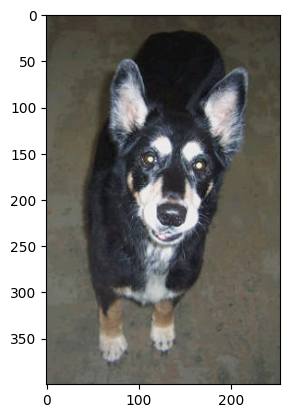

In [19]:
from matplotlib import pyplot
from matplotlib.image import imread

image = imread(img_path)
pyplot.imshow(image)
pyplot.show()

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Get a list of all image files in the test directory for cats
test_cat_files = os.listdir(os.path.join(test_dir, 'cat'))

# Select one image file (e.g., the first one)
img_path = os.path.join(test_dir, 'cat', test_cat_files[5])

# Load and preprocess the image for cat
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Print the prediction based on the class index
if predicted_class_index == 1:
    print(f"Prediction: Dog")
else:
    print(f"Prediction: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Prediction: Cat


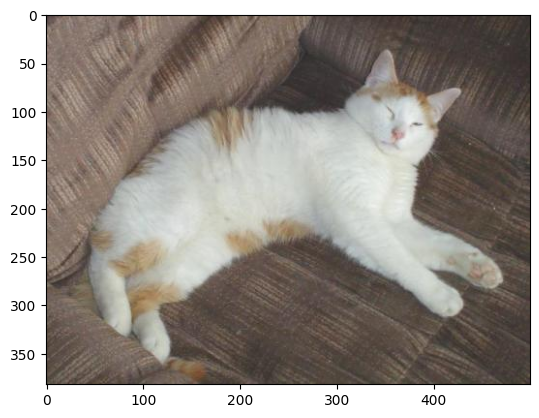

In [21]:
from matplotlib import pyplot
from matplotlib.image import imread

image = imread(img_path)
pyplot.imshow(image)
pyplot.show()